In [1]:
import torch
import torch.nn as nn

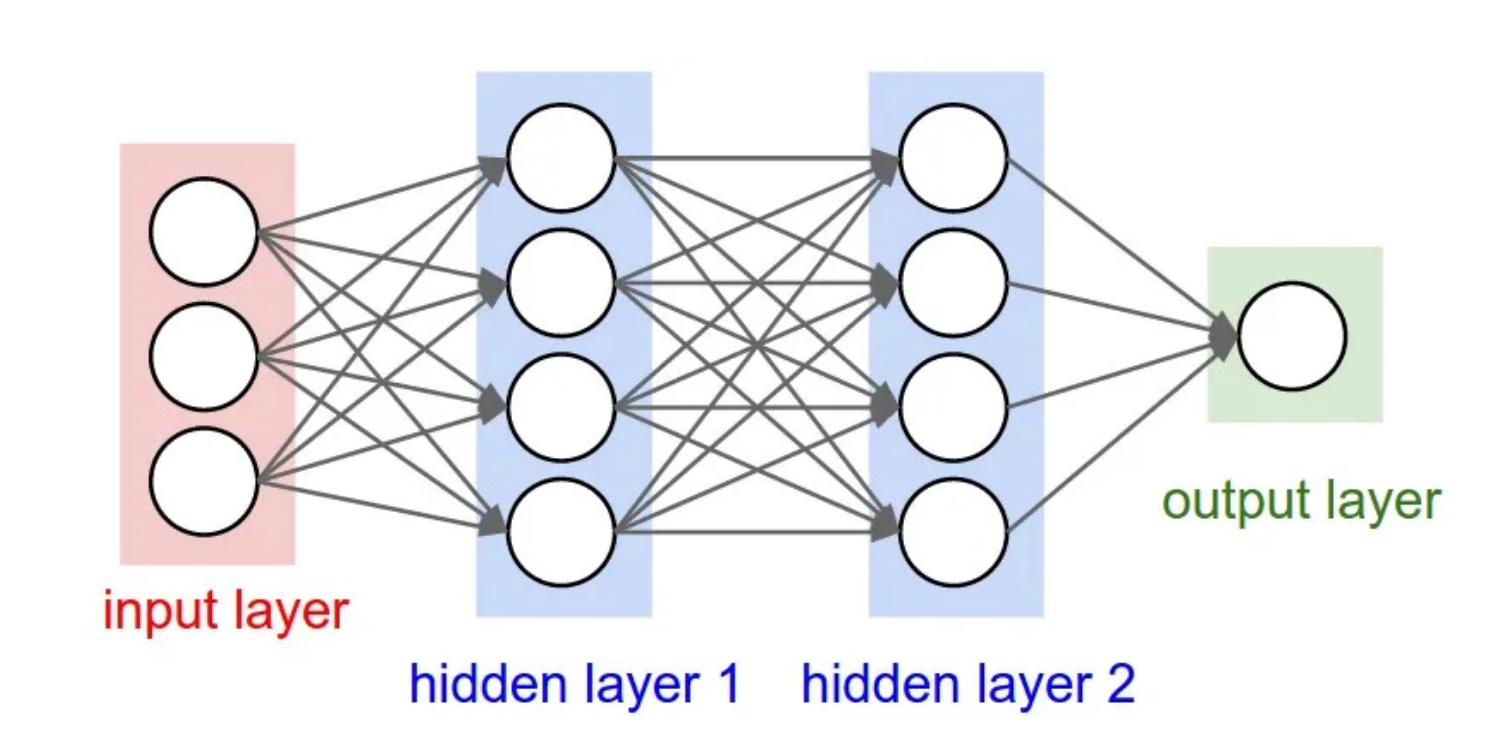

In [15]:
# Building Basic Neural Network

class MyModel(nn.Module):
    
    # Basic Model Declaration 
    def __init__(self) -> None:
        super().__init__()
        self.input_layer = nn.Linear(10,4)
        self.hidden_layer_1 = nn.Linear(4,4)
        self.hidden_layer_2 = nn.Linear(4,1)
        

    # Similar to get_model_prediction in basics/linear_regression
    def forward(self,X):
        #PyTorch automatically invokes the forward() method behind the scenes.
        return self.hidden_layer_2(self.hidden_layer_1(self.input_layer(X)))


In [22]:
input_array = torch.randn(size=(10, 10))
input_array

tensor([[-0.3609,  0.9425, -0.6728,  1.8603, -0.4698, -0.2069, -0.0988, -0.1637,
          1.5418, -1.5012],
        [ 1.0872,  0.3890,  0.3656, -1.3662,  0.6735, -0.6143,  1.6409, -0.3338,
          0.3495,  0.2817],
        [-0.6073, -1.4031, -0.0606, -1.1469,  1.6692, -0.7444,  2.1968, -0.0810,
          0.5482, -0.4721],
        [-1.2752,  0.2239, -0.5880,  0.4011, -0.0809,  0.0583,  0.0347, -1.0855,
          1.6850, -0.4464],
        [ 1.7779,  1.7051,  0.2220, -0.5895,  0.7010, -0.7727,  0.6084,  0.2151,
         -0.4222,  1.6700],
        [-1.1224,  0.9712, -0.1987,  0.7176,  2.0444, -0.0809,  1.0197, -0.1784,
         -0.2634,  0.4381],
        [-0.3431, -0.6982, -1.2016, -0.0822,  0.1735, -0.0987, -0.4038, -2.4815,
         -1.1012, -0.3313],
        [ 1.1508,  1.1232,  0.7290,  1.4579,  0.0543, -1.3218,  1.0331, -0.7731,
         -1.7467,  0.2987],
        [ 0.0853, -0.6208,  1.8801,  0.4485, -1.6623,  1.0758, -0.7618, -0.2869,
         -2.8126, -0.0566],
        [-1.6626, -

In [23]:
y_true = torch.randn(size=(10,1))
y_true

tensor([[-0.7701],
        [ 0.9480],
        [ 0.5946],
        [-0.8481],
        [ 0.2683],
        [ 0.3106],
        [-0.8392],
        [ 0.7643],
        [ 2.0961],
        [ 1.7503]])

In [28]:
# TODO : Train the Neural Network, Calculate Loss 

model = MyModel()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

epocs = 5 

for iter in range(epocs):
    model_pred = model(input_array)
    # TO remove the previous derivatives
    optimizer.zero_grad()
    # Computing Loss
    loss = loss_function(model_pred,y_true)
    print("Loss:",loss.item(), "Gradient Function:", loss.grad_fn)
    # Calculate Derivatives
    loss.backward()
    # Updates our Weights : new weight = old weight - derivate * learning rate
    optimizer.step()

Loss: -0.0 Gradient Function: <DivBackward1 object at 0x13a127c70>
Loss: -0.0 Gradient Function: <DivBackward1 object at 0x13a127c70>
Loss: -0.0 Gradient Function: <DivBackward1 object at 0x13a127c70>
Loss: -0.0 Gradient Function: <DivBackward1 object at 0x13a127c70>
Loss: -0.0 Gradient Function: <DivBackward1 object at 0x13a127c70>


In [29]:
model.eval()

MyModel(
  (input_layer): Linear(in_features=10, out_features=4, bias=True)
  (hidden_layer_1): Linear(in_features=4, out_features=4, bias=True)
  (hidden_layer_2): Linear(in_features=4, out_features=1, bias=True)
)